In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [189]:
df=pd.read_csv('train.csv')

In [190]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [191]:
df.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 27 columns):
label           31428 non-null int64
id              31428 non-null int64
visitTime       31428 non-null int64
purchaseTime    31428 non-null int64
hour            31428 non-null int64
C1              31428 non-null int64
C2              31428 non-null int64
C3              31428 non-null int64
C4              31428 non-null int64
C5              31428 non-null int64
C6              31428 non-null int64
C7              31428 non-null int64
C8              31428 non-null int64
N1              31428 non-null int64
C9              31428 non-null int64
N2              31428 non-null int64
N3              31428 non-null int64
N4              31428 non-null int64
N5              31428 non-null int64
N6              31428 non-null int64
N7              31428 non-null int64
N8              31428 non-null int64
N9              31428 non-null int64
N10             31428 non-null int64
C10

In [193]:
df=df.drop(['id','purchaseTime'],axis=1)

In [194]:
df.head()

,label,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,19274330,0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,19274334,0,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,19274353,0,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,19274358,0,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,19274367,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [195]:
df=df.drop(['purchaseTime'],axis=1)

KeyError: "['purchaseTime'] not found in axis"

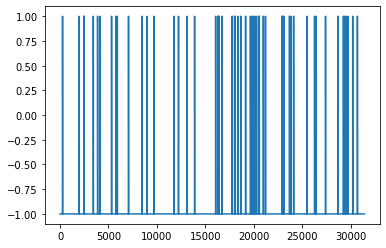

In [196]:
plt.plot(df['label'])

In [197]:
def recode(series):
    if series == -1:
        return 0
    else:
        return series
df['label'] = df['label'].apply(recode)

In [198]:
df['label'].value_counts()

0    31371
1       57
Name: label, dtype: int64

In [199]:
xdata=df.drop(['label'],1)
y=df['label']

In [200]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdata, y, test_size=0.2, random_state=21, stratify=y)

In [201]:
y_test

14925    0
13930    0
16186    0
20213    0
3014     0
        ..
16976    0
5563     0
6873     0
23105    0
14701    0
Name: label, Length: 6286, dtype: int64

In [202]:
!pip install imblearn
!pip install Tensorflow
!pip install imbalanced-learn --user
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.01)
X_rus, y_rus = rus.fit_sample(x_train, y_train)

  ERROR: Could not find a version that satisfies the requirement Tensorflow (from versions: none)
ERROR: No matching distribution found for Tensorflow


In [203]:
y.value_counts()

0    31371
1       57
Name: label, dtype: int64

In [204]:
y_rus.value_counts()

0    4600
1      46
Name: label, dtype: int64

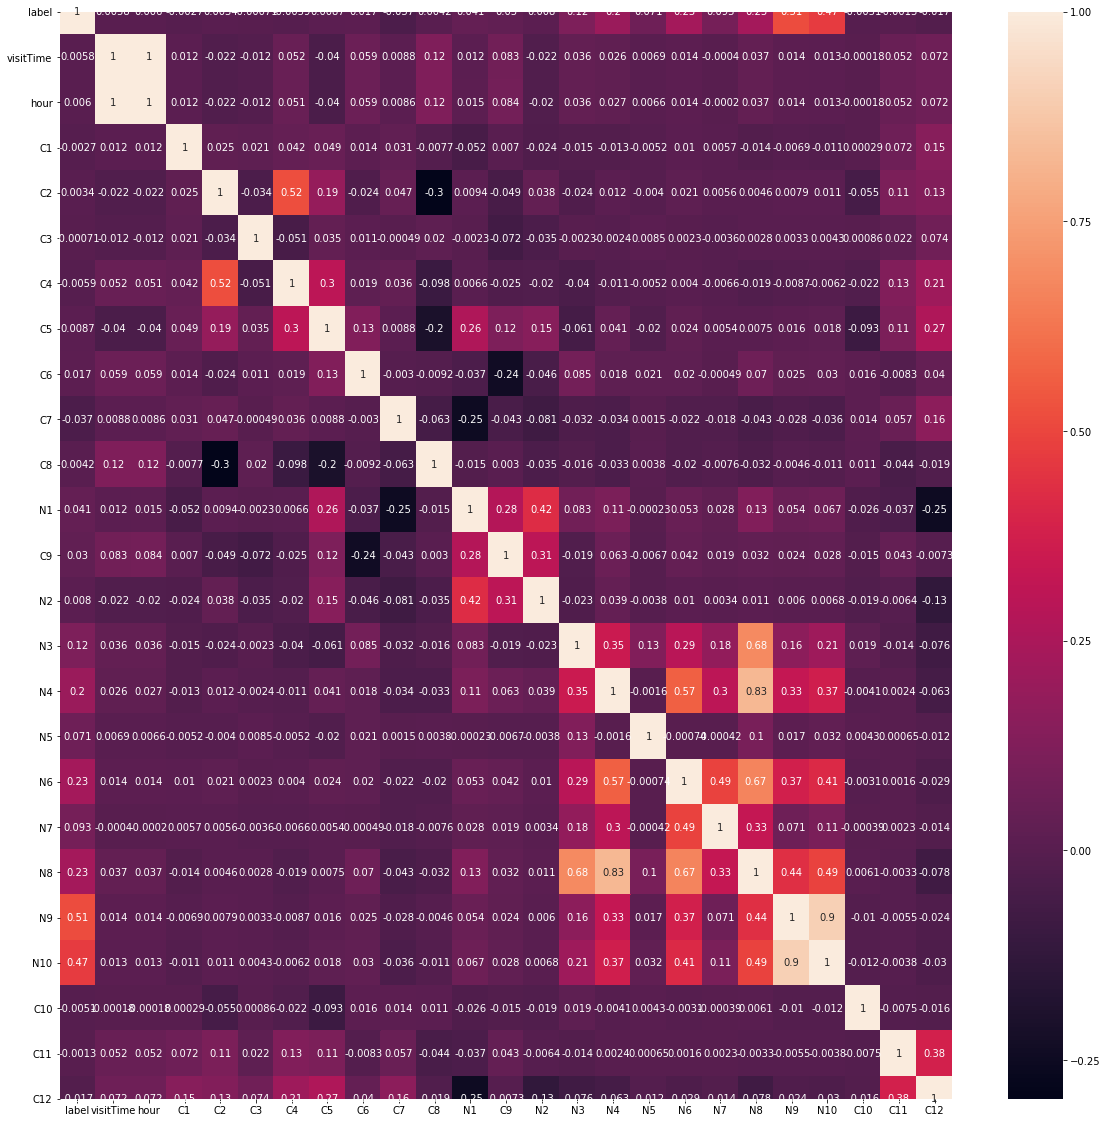

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

In [205]:
#logistic regression

import statsmodels.api as sm
mlog = sm.Logit(y, xdata)
result = mlog.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.006784
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                31428
Model:                          Logit   Df Residuals:                    31404
Method:                           MLE   Df Model:                           23
Date:                Sun, 22 Mar 2020   Pseudo R-squ.:                  0.4884
Time:                        19:14:28   Log-Likelihood:                -213.22
converged:                       True   LL-Null:                       -416.76
Covariance Type:            nonrobust   LLR p-value:                 6.200e-72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
visitTime  -2.764e-07   1.02e-07     -2.715      0.007   -4.76e-07   -7.69e-08
hour          -0.0579      0

In [215]:
X_rus_lr = X_rus[['visitTime', 'C6','C7', 'C9', 'N3', 'N4', 'N5', 'N6', 'N8', 'N9']]
X_test_lr = x_test[['visitTime', 'C6','C7', 'C9', 'N3', 'N4', 'N5', 'N6', 'N8', 'N9']]

In [216]:
from sklearn.linear_model import LogisticRegression
mlr = LogisticRegression(random_state=42, class_weight='balanced')
result = mlr.fit(X_rus_lr, y_rus)

In [217]:
mlrpred = mlr.predict(X_test_lr)
mlrprob = mlr.predict_proba(X_test_lr)

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,mlrpred)

0.7984409799554566

In [219]:
from sklearn.metrics import confusion_matrix, classification_report
lrcm = confusion_matrix(y_test,mlrpred)
lrcm

array([[5014, 1261],
       [   6,    5]], dtype=int64)

In [220]:
roc = metrics.roc_auc_score(y_test, mlrpred)
roc

0.6267946396233249

In [221]:
test=pd.read_csv('test.csv')

In [222]:
test=test.drop(['id','purchaseTime'],axis=1)

In [223]:
def recode(series):
    if series == -1:
        return 0
    else:
        return series
test['label'] = test['label'].apply(recode)

In [224]:
test

,label,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,0,19360733,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,0,19360734,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,0,19360735,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,0,19360737,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,0,19360752,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,0,19446873,23,2569487005,2018710401,887116886,652481754,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,1546561973,3617851689,4220791646
32082,0,19446914,23,2569487005,403381353,3475347077,652481754,2967512603,4013717548,2303407174,...,0,0,0,0,0,0,0,3227742820,3617851689,4220791646
32083,0,19446925,23,2569487005,403381353,3475347077,652481754,2967512603,4013717548,2303407174,...,0,0,0,0,0,0,0,4069315994,3617851689,4220791646
32084,0,19446931,23,2569487005,2541203883,448895441,2308170622,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,2724771230,3617851689,4220791646


In [225]:
xdatatest=test.drop(['label'],1)
y=test['label']

In [227]:
xxdatatest = xdatatest[['visitTime', 'C6','C7', 'C9', 'N3', 'N4', 'N5', 'N6', 'N8', 'N9']]

In [228]:
mlrpredtest = mlr.predict(xxdatatest)
mlrprobtest = mlr.predict_proba(xxdatatest)

In [229]:
predictionstest = pd.Series(data=mlrpredtest, index=xdatatest.index, name='predicted_value')
predictionstest

0        0
1        0
2        0
3        1
4        0
        ..
32081    1
32082    0
32083    0
32084    1
32085    1
Name: predicted_value, Length: 32086, dtype: int64

In [230]:
proba = pd.DataFrame(data=mlrprobtest, index=xdatatest.index)
proba = proba.drop([0], 1)
proba.rename(columns={1: 'Probs'})

,Probs
0,0.181930
1,0.193890
2,0.193890
3,0.747960
4,0.181930
...,...
32081,0.747082
32082,0.273725
32083,0.273725
32084,0.747082
